In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
%matplotlib inline


In [54]:
consumer_complaints = pd.read_csv('complaints_dec_2014.csv')

In [55]:
consumer_complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [56]:
consumer_complaints.index = pd.to_datetime(consumer_complaints.index, unit='s')

In [57]:
complaint_and_company = consumer_complaints[['Complaint ID', 'Company']]
                    

In [60]:
sorted_complaint_and_company = complaint_and_company.sort_values(by='Company')

In [62]:
popped_companies = sorted_complaint_and_company.pop('Company')

In [64]:
popped_companies.value_counts().head(10)

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
Name: Company, dtype: int64

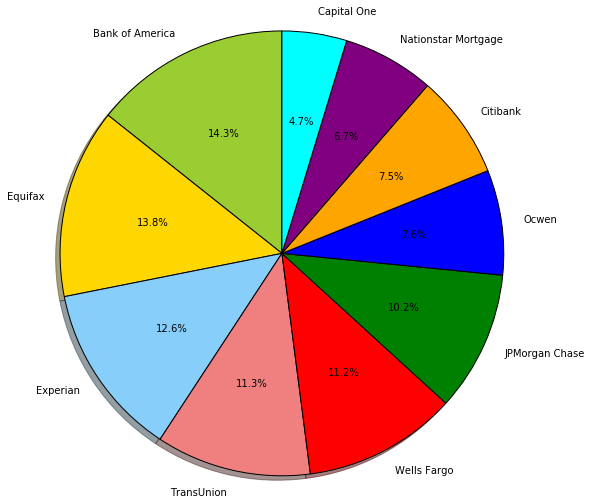

In [116]:
labels = 'Bank of America', 'Equifax', 'Experian', 'TransUnion', 'Wells Fargo', 'JPMorgan Chase', 'Ocwen', 'Citibank', 'Nationstar Mortgage', 'Capital One'
sizes = [766, 737, 675, 604, 598, 545, 408, 403, 357, 252]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'green', 'blue', 'orange', 'purple', 'aqua']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [66]:
product_and_company = consumer_complaints[['Product', 'Company']]

In [68]:
sorted_product_and_company = product_and_company.sort_values(by='Product')

In [83]:
sorted_product_and_company['Product'].value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

In [85]:
complaint_and_product = consumer_complaints[['Complaint ID', 'Product']]

In [88]:
sorted_complaint_and_product = complaint_and_product.sort_values(by='Product')

In [90]:
popped_products = sorted_complaint_and_product.pop('Product')

In [92]:
popped_products.value_counts()

Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
Name: Product, dtype: int64

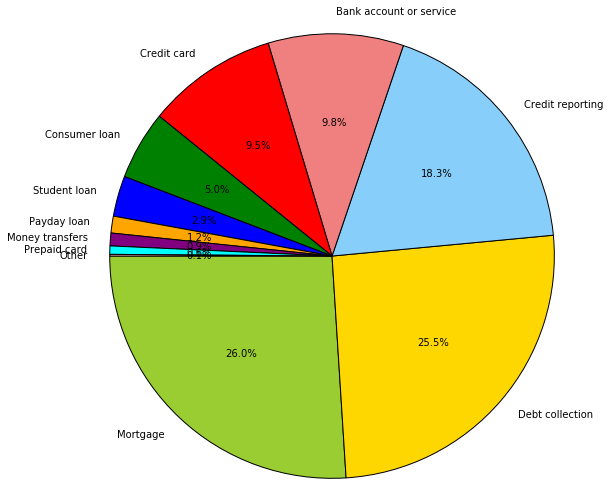

In [115]:
labels = 'Mortgage', 'Debt collection', 'Credit reporting', 'Bank account or service', 'Credit card', 'Consumer loan', 'Student loan', 'Payday loan', 'Money transfers', 'Prepaid card', 'Other'
sizes = [3002, 2942, 2113, 1136, 1100, 578, 340, 141, 107, 70, 14]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'green', 'blue', 'orange', 'purple', 'aqua', 'pink']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=False, startangle=180)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()